In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def patch_diff(patch1, patch2):
    """Computing the sum of squared differences (SSD) between two images."""
    if patch1.shape != patch2.shape:
        print("Images don't have the same shape.")
        return
    return np.sum((np.array(patch1, dtype=np.float32) - np.array(patch2, dtype=np.float32))**2)

In [26]:
def plot_histograms(results_noisy_descr_patches_diffs, results_noisy_descr_patches_x_coords, results_noisy_descr_patches_y_coords, results_noisy_descr_patches_positions, bins):

    for nr_similar_patches in [5,10,20,50,100]:
        ssds = []

        for q_it in range(total_nr_query_patches):
            for c_it in range(nr_similar_patches):

                # getting the query patch from the clean image
                x_query = query_x_coords[q_it]
                y_query = query_y_coords[q_it]
                query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]

                # getting the compare patch from the clean image
                x_compare = results_noisy_descr_patches_x_coords[q_it][c_it]
                y_compare = results_noisy_descr_patches_y_coords[q_it][c_it]
                compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]

                # calculating the difference in the clean image
                actual_diff = patch_diff(query_patch, compare_patch)
                ssds.append(actual_diff)

        ssds = np.array(ssds)

        plt.figure(figsize=(10, 5))
        plt.hist(ssds, bins=bins, density=1)
        plt.xlim(0, 3000000)
        plt.ylim(0, 0.00001)
        plt.show()

In [32]:
# zizakic finetuned
pickle_dir = 'zimnica'
pickle_file_path = pickle_dir + '/histograms_zizakic_finetuned_panel13_qstride300_cstride8_20191126_102008.pickle'
try:
    total_nr_query_patches_f, results_noisy_descr_patches_diffs_f, results_noisy_descr_patches_x_coords_f, results_noisy_descr_patches_y_coords_f, results_noisy_descr_patches_positions_f, query_x_coords_f, query_y_coords_f, image_f, patch_size_f = pickle.load(open(pickle_file_path, "rb"))
except Exception as e:
    print("Problem while trying to unpickle: ", str(e))

In [34]:
# zizakic
pickle_dir = 'zimnica'
pickle_file_path = pickle_dir + '/histograms_zizakic_panel13_qstride300_cstride8_20191126_120454.pickle'
try:
    total_nr_query_patches_z, results_noisy_descr_patches_diffs_z, results_noisy_descr_patches_x_coords_z, results_noisy_descr_patches_y_coords_z, results_noisy_descr_patches_positions_z, query_x_coords_z, query_y_coords_z, image_z, patch_size_z = pickle.load(open(pickle_file_path, "rb"))
except Exception as e:
    print("Problem while trying to unpickle: ", str(e))

In [35]:
# chen
pickle_dir = 'zimnica'
pickle_file_path = pickle_dir + '/histograms_chen_panel13_qstride300_cstride8_20191126_102119.pickle'
try:
    total_nr_query_patches_c, results_noisy_descr_patches_diffs_c, results_noisy_descr_patches_x_coords_c, results_noisy_descr_patches_y_coords_c, results_noisy_descr_patches_positions_c, query_x_coords_c, query_y_coords_c, image_c, patch_size_c = pickle.load(open(pickle_file_path, "rb"))
except Exception as e:
    print("Problem while trying to unpickle: ", str(e))

In [37]:
assert total_nr_query_patches_c == total_nr_query_patches_z
assert query_x_coords_c == query_x_coords_z
assert query_y_coords_c == query_y_coords_z
assert image_c.all() == image_z.all()
assert patch_size_c == patch_size_z

assert total_nr_query_patches_c == total_nr_query_patches_f
assert query_x_coords_c == query_x_coords_f
assert query_y_coords_c == query_y_coords_f
assert image_c.all() == image_f.all()
assert patch_size_c == patch_size_f


total_nr_query_patches == total_nr_query_patches_c
query_x_coords == query_x_coords_c
query_y_coords == query_y_coords_c
image == image_c
patch_size == patch_size_c

True

In [46]:
bins = np.linspace(0, 3000000, 100)

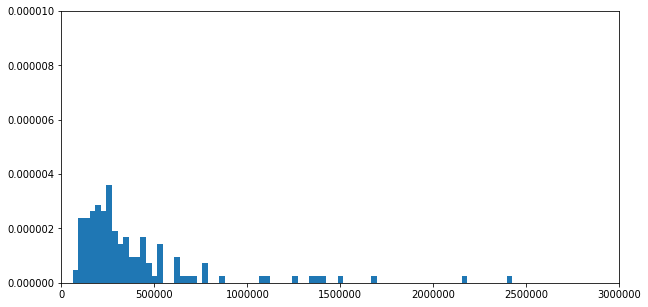

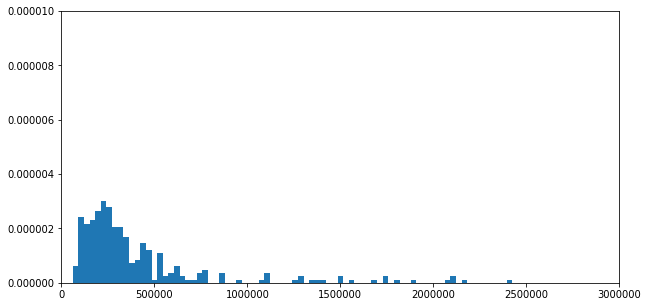

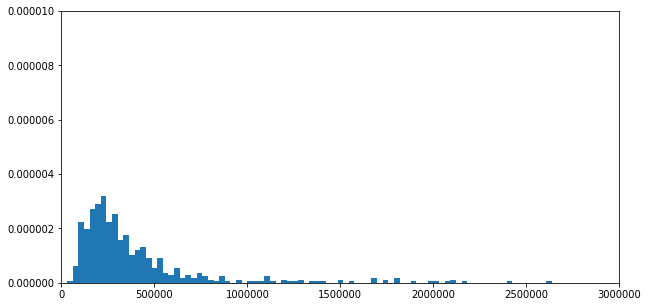

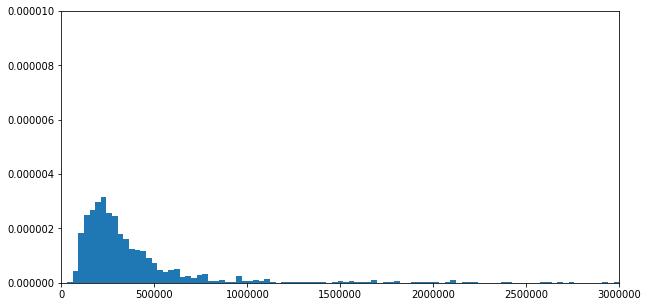

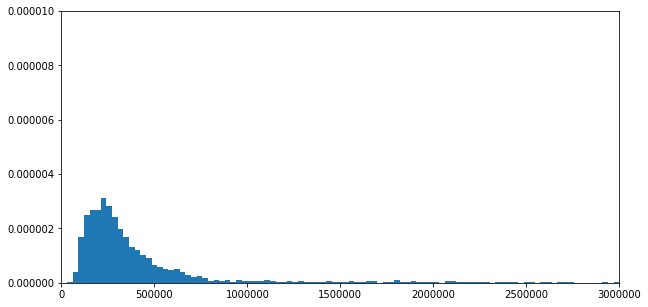

In [47]:
plot_histograms(results_noisy_descr_patches_diffs_c, results_noisy_descr_patches_x_coords_c, results_noisy_descr_patches_y_coords_c, results_noisy_descr_patches_positions_c, bins)

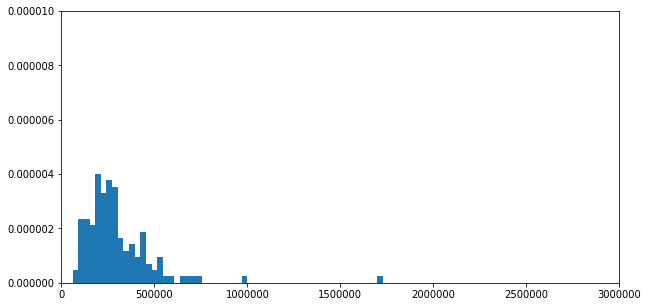

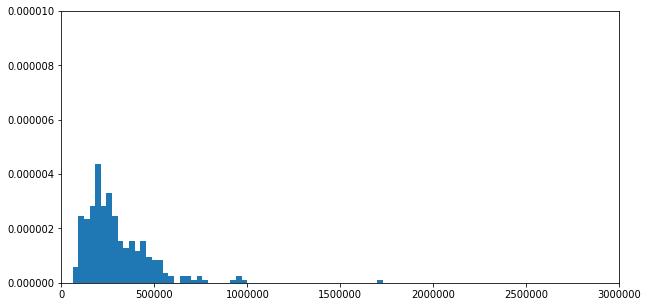

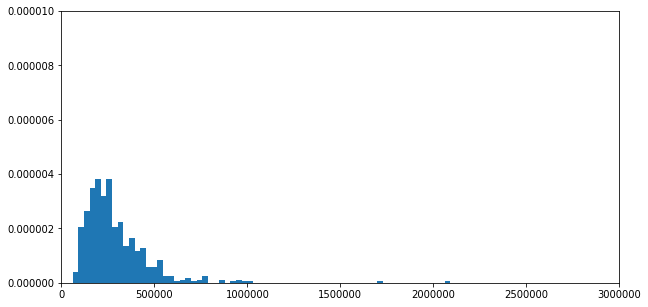

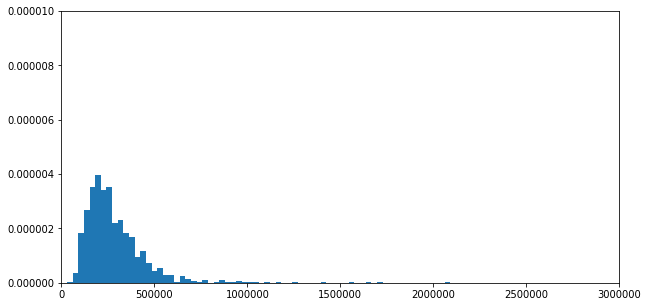

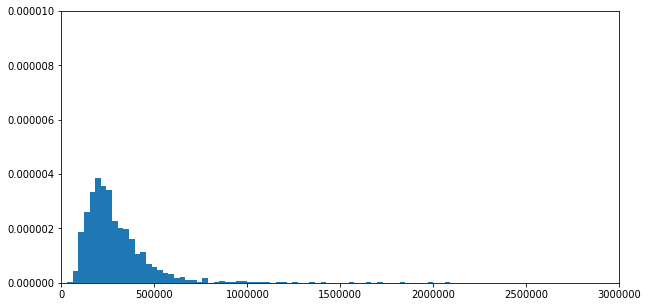

In [48]:
plot_histograms(results_noisy_descr_patches_diffs_z, results_noisy_descr_patches_x_coords_z, results_noisy_descr_patches_y_coords_z, results_noisy_descr_patches_positions_z, bins)

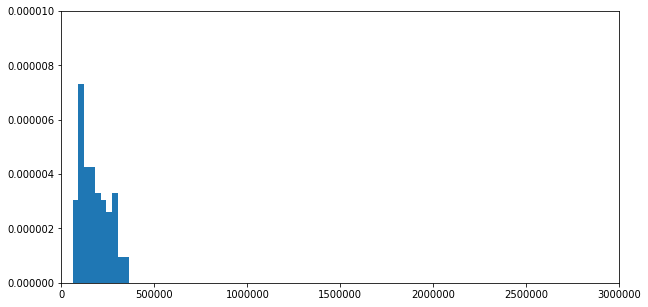

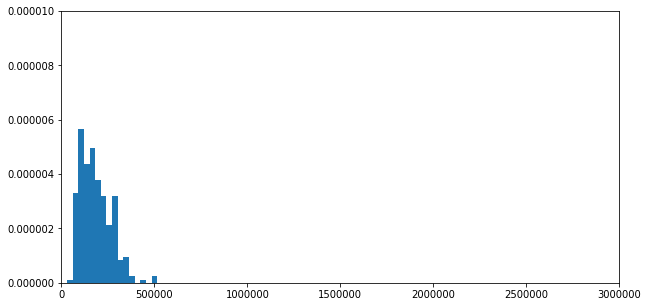

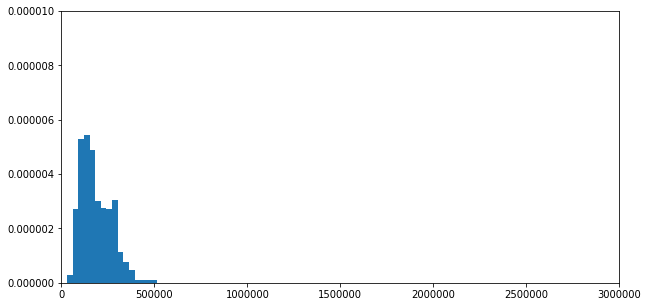

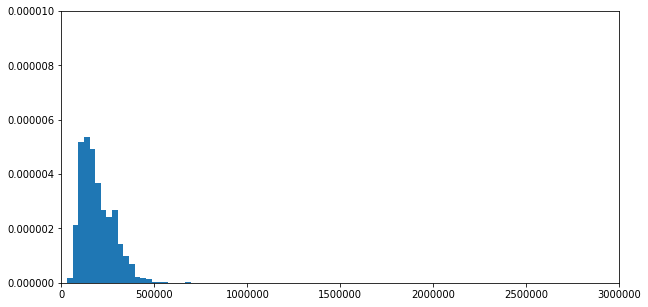

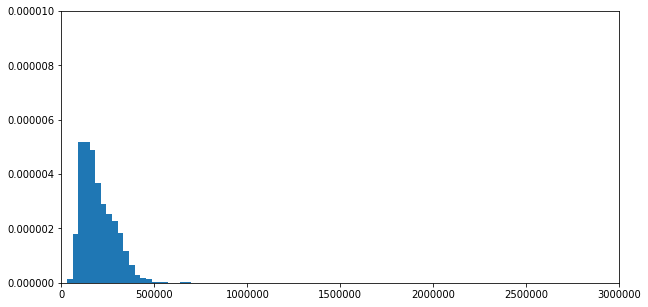

In [49]:
plot_histograms(results_noisy_descr_patches_diffs_f, results_noisy_descr_patches_x_coords_f, results_noisy_descr_patches_y_coords_f, results_noisy_descr_patches_positions_f, bins)

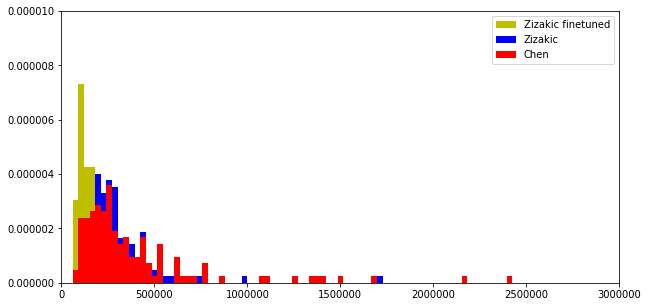

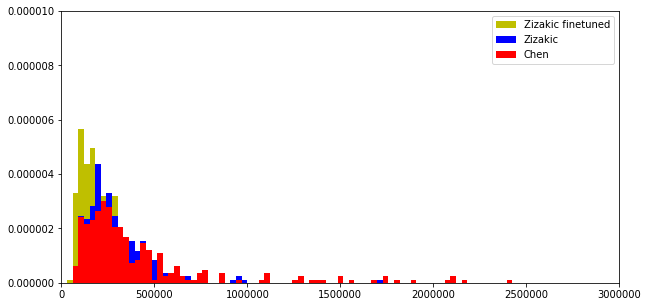

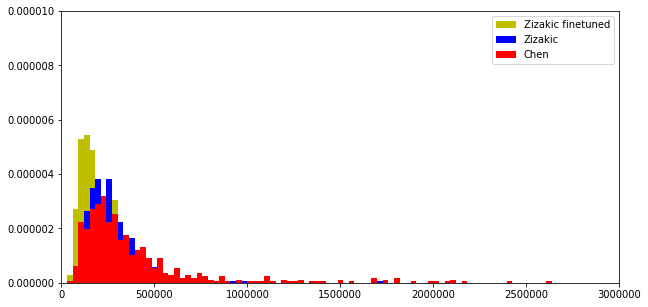

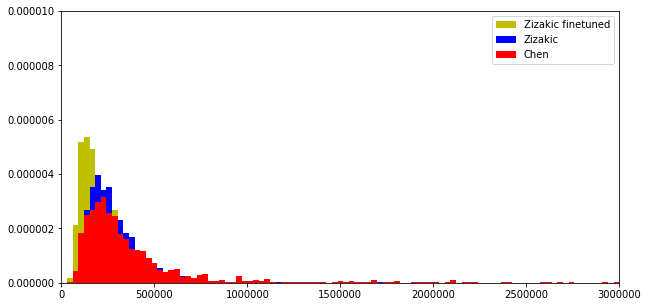

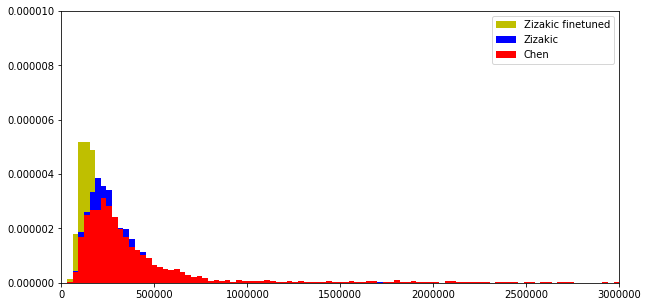

In [61]:
alpha_value = 1.

for nr_similar_patches in [5,10,20,50,100]:
    
    plt.figure(figsize=(10, 5))

    ssds = []
    for q_it in range(total_nr_query_patches):
        for c_it in range(nr_similar_patches):

            # getting the query patch from the clean image
            x_query = query_x_coords[q_it]
            y_query = query_y_coords[q_it]
            query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]

            # getting the compare patch from the clean image
            x_compare = results_noisy_descr_patches_x_coords_f[q_it][c_it]
            y_compare = results_noisy_descr_patches_y_coords_f[q_it][c_it]
            compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]

            # calculating the difference in the clean image
            actual_diff = patch_diff(query_patch, compare_patch)
            ssds.append(actual_diff)
    ssds = np.array(ssds)
    plt.hist(ssds, bins=bins, alpha=alpha_value, density=1, label='Zizakic finetuned', color='y')

    ssds = []
    for q_it in range(total_nr_query_patches):
        for c_it in range(nr_similar_patches):

            # getting the query patch from the clean image
            x_query = query_x_coords[q_it]
            y_query = query_y_coords[q_it]
            query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]

            # getting the compare patch from the clean image
            x_compare = results_noisy_descr_patches_x_coords_z[q_it][c_it]
            y_compare = results_noisy_descr_patches_y_coords_z[q_it][c_it]
            compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]

            # calculating the difference in the clean image
            actual_diff = patch_diff(query_patch, compare_patch)
            ssds.append(actual_diff)
    ssds = np.array(ssds)
    plt.hist(ssds, bins=bins, alpha=alpha_value, density=1, label='Zizakic', color='b')

    ssds = []
    for q_it in range(total_nr_query_patches):
        for c_it in range(nr_similar_patches):

            # getting the query patch from the clean image
            x_query = query_x_coords[q_it]
            y_query = query_y_coords[q_it]
            query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]

            # getting the compare patch from the clean image
            x_compare = results_noisy_descr_patches_x_coords_c[q_it][c_it]
            y_compare = results_noisy_descr_patches_y_coords_c[q_it][c_it]
            compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]

            # calculating the difference in the clean image
            actual_diff = patch_diff(query_patch, compare_patch)
            ssds.append(actual_diff)
    ssds = np.array(ssds)
    plt.hist(ssds, bins=bins, alpha=alpha_value, density=1, label='Chen', color='r')


    plt.xlim(0, 3000000)
    plt.ylim(0, 0.00001)
    plt.legend(loc='upper right')
    plt.show()